# Чтение данных

In [1]:
import pandas as pd

df = pd.read_csv("medical_diagnosis.csv")
df.head()

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0


In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

age                      0
sex                      0
BMI                      0
systolic_bp              0
cholesterol_mg_dl        0
fasting_glucose_mg_dl    0
smoking_status           0
family_history           0
activity_level           0
symptom_score            0
CRP_mg_L                 0
WBC_10e9_L               0
ECG_result               0
Disease                  0
dtype: int64

Просмотр данных на наличие пропусков и соответствие типам данных

In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease,sex_Male,smoking_status_Former,smoking_status_Never,family_history_Yes,activity_level_Low,activity_level_Moderate,ECG_result_Normal,ECG_result_ST-T abnormality
0,34,16.8,132.0,196.0,78.0,0.2,0.58,8.60,0,True,False,False,False,False,False,True,False
1,24,29.2,118.0,182.0,96.0,3.2,2.72,6.54,0,False,False,False,False,False,True,True,False
2,19,16.5,121.0,268.0,101.0,3.8,0.18,6.61,0,False,False,False,False,False,True,True,False
3,89,15.4,117.0,136.0,96.0,2.6,1.83,5.67,0,False,False,True,False,True,False,True,False
4,66,16.7,82.0,241.0,126.0,3.5,1.16,2.66,0,True,True,False,False,False,True,True,False


# Матрица диаграмм рассеивания

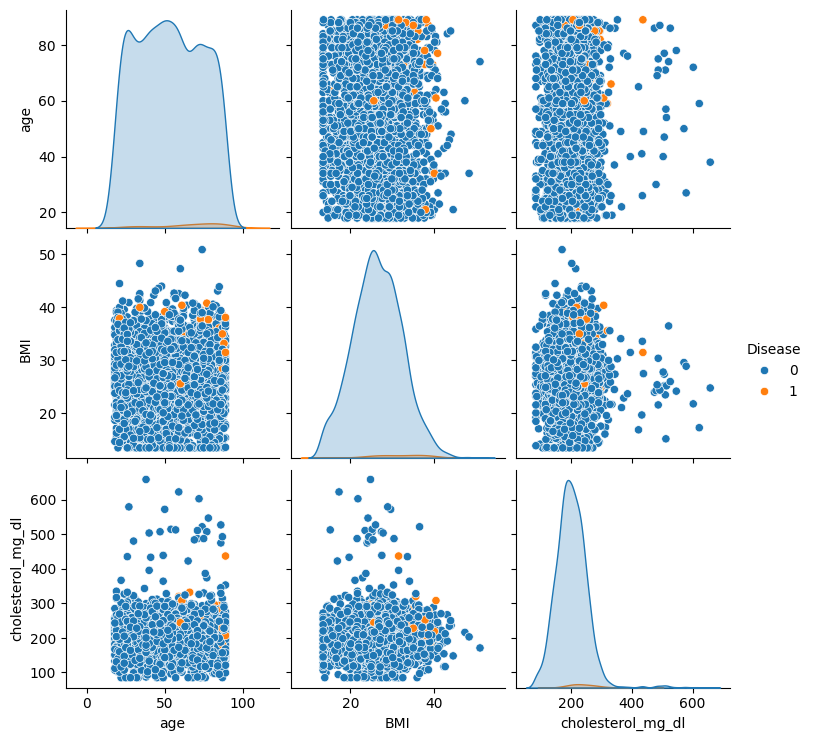

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['age', 'BMI', 'cholesterol_mg_dl', 'Disease']],hue='Disease')
plt.show()

# Подготовка данных к анализу

In [4]:
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]

Для подготовки данных к обучению моделей машинного обучения категориальные признаки были преобразованы в числовой формат с помощью метода прямого кодирования (One-Hot Encoding).

Функция `pd.get_dummies()` создаёт бинарные признаки для каждого категориального значения.   Параметр `drop_first=True` используется для исключения одного признака.

После кодирования был сформирован итоговый датафрейм `df_encoded`, содержащий только числовые признаки.
Далее данные были разделены на:
- X — матрицу признаков (все столбцы, кроме целевого признака),
- y — целевую переменную `Disease`, отражающую наличие заболевания.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Датасет был разделён на обучающую и тестовую выборки с помощью функции
`train_test_split`.

Параметры разбиения:
`test_size = 0.25` - 25% данных используются для тестирования модели;
`random_state = 42` - фиксирует случайность разбиения для воспроизводимости результатов;
`stratify = y` - обеспечивает сохранение исходного соотношения классов целевой переменной в обучающей и тестовой выборках.

Для корректной работы алгоритмов, основанных на расстояниях между объектами,
была выполнена стандартизация признаков с использованием `StandardScaler`.

В результате стандартизации каждый признак имеет:
среднее значение, равное 0;
стандартное отклонение, равное 1.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Результат для kNN

Алгоритм kNN основан на предположении, что объекты, находящиеся близко друг к другу в пространстве признаков, принадлежат к одному классу.
Для нового объекта модель находит k ближайших соседей из обучающей выборки и относит объект к тому классу, который встречается среди соседей чаще всего.

Используемые параметры модели:
n_neighbors = 5 - количество ближайших соседей, участвующих в голосовании. Было выбрано нечётное значение, чтобы избежать ситуации равенства голосов между классами.
weights = 'uniform' - все соседи имеют одинаковый вес при принятии решения.
algorithm = 'auto' - алгоритм поиска соседей выбирается автоматически в зависимости от структуры данных.
leaf_size = 30 - параметр, влияющий на скорость работы дерева поиска соседей.
p = 2 - используется евклидово расстояние (p = 2 соответствует L2-норме).
metric = 'minkowski' - обобщённая метрика расстояния, при p = 2 эквивалентна евклидовой.

Перед обучением модели все числовые признаки были стандартизированы с помощью StandardScaler, так как алгоритм kNN чувствителен к масштабу признаков и использует расстояния между объектами.

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


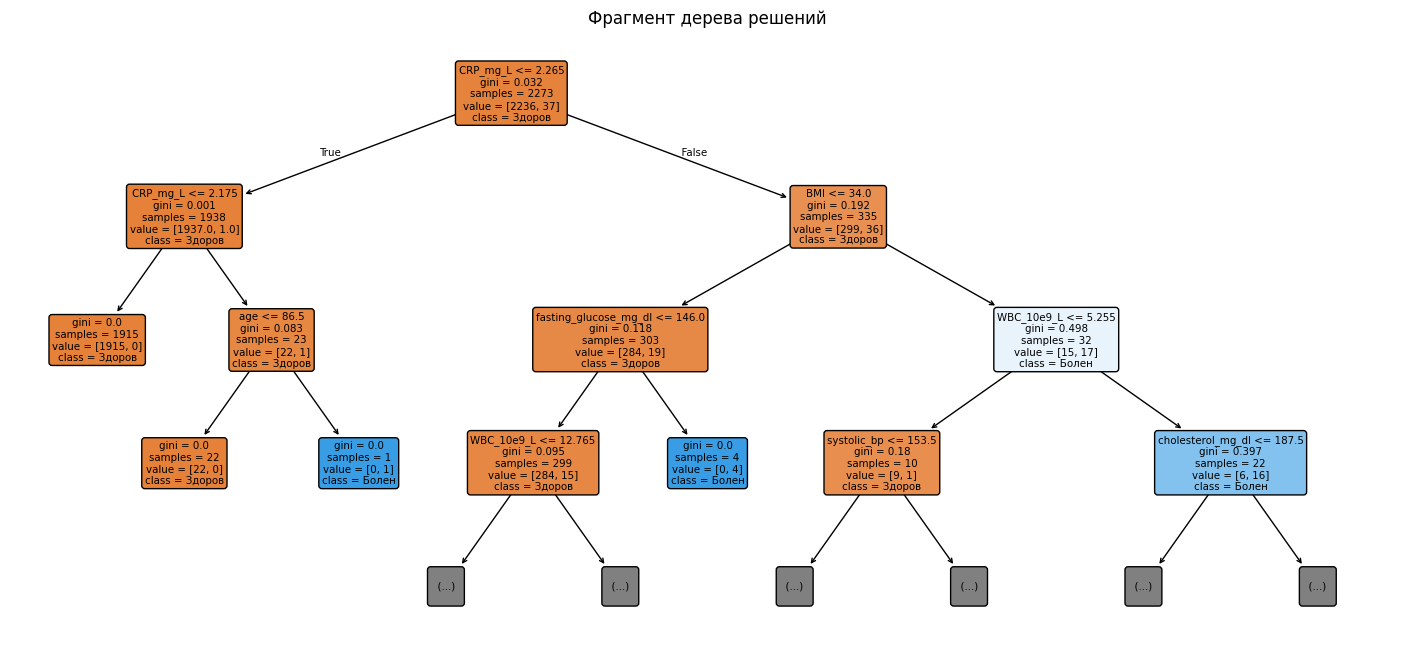

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Здоров", "Болен"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Фрагмент дерева решений")
plt.show()

## Резлуьтат для ререва решений

Для решения задачи бинарной классификации была использована модель **дерева решений**.

Дерево решений последовательно разбивает пространство признаков на области, максимально однородные по целевому классу, используя критерий качества разбиения.

Модель была обучена со следующими параметрами:
`criterion = 'gini'` - в качестве критерия разбиения используется индекс Джини;
`max_depth = 5` - максимальная глубина дерева ограничена для предотвращения переобучения;
`random_state = 42` - обеспечивает воспроизводимость результатов.

Ограничение глубины дерева позволяет сохранить баланс между
качеством классификации и обобщающей способностью модели.

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


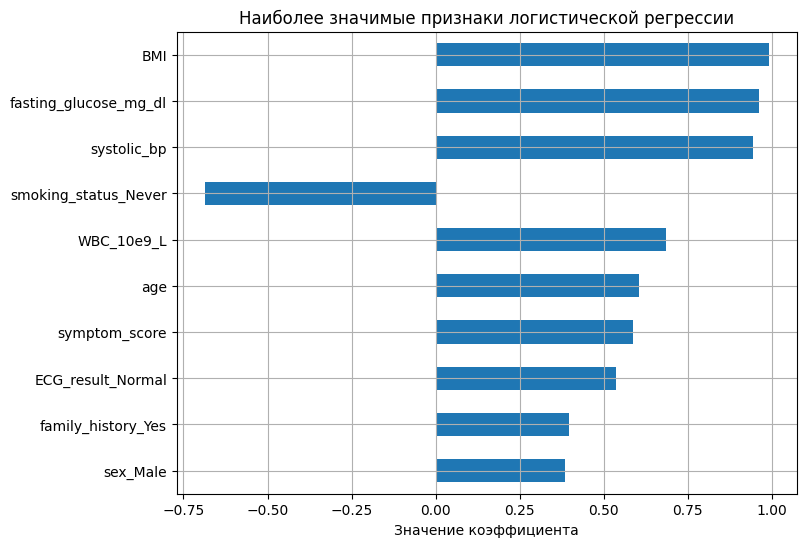

In [10]:
coef = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
coef.head(10).plot(kind="barh")
plt.xlabel("Значение коэффициента")
plt.title("Наиболее значимые признаки логистической регрессии")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

## Результат для логистической регрессии

Для решения задачи бинарной классификации была использована модель **логистической регрессии**.

Логистическая регрессия оценивает вероятность принадлежности объекта к положительному классу («Болен») с помощью логистической функции и принимает решение на основе порогового значения вероятности.

Модель была обучена на стандартизированных данных.

Основные параметры обученной модели:

`penalty = 'l2'` — используется L2-регуляризация для предотвращения переобучения;
`C = 1.0` — коэффициент силы регуляризации (обратная величина);
`solver = 'lbfgs'` — алгоритм оптимизации, подходящий для бинарной классификации;
`fit_intercept = True` — в модель добавляется свободный член;
`max_iter = 1000` — увеличенное число итераций для гарантии сходимости модели;
`class_weight = None` — веса классов не использовались.

Коэффициенты логистической регрессии отражают вклад каждого признака
в вероятность отнесения пациента к классу «Болен».

Абсолютное значение коэффициента показывает степень влияния признака:
чем больше модуль коэффициента, тем сильнее влияние признака на результат;
положительное значение коэффициента увеличивает вероятность заболевания;
отрицательное значение коэффициента снижает вероятность заболевания.

На графике представлены 10 наиболее значимых признаков по абсолютному значению коэффициентов логистической регрессии. По результатам самыми значимыми критериями стали BMI, fasting_glucose_mg_dl и systolic_bp


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=7
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


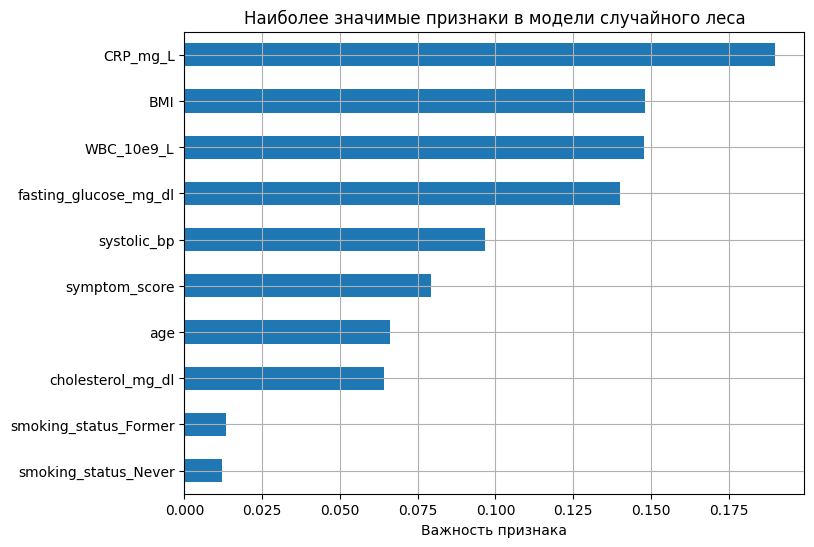

In [12]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(10).plot(kind="barh")
plt.xlabel("Важность признака")
plt.title("Наиболее значимые признаки в модели случайного леса")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

## Результат для случайного леса

Для повышения качества классификации была использована ансамблевая модель **случайного леса**, представляющая собой совокупность деревьев решений.

Каждое дерево обучается на случайной подвыборке данных и случайном подмножестве признаков, а итоговое предсказание формируется путём голосования всех деревьев. Данный подход позволяет снизить переобучение и повысить устойчивость модели.

Модель была обучена со следующими параметрами:

`n_estimators = 200` — количество деревьев в ансамбле;
`criterion = 'gini'` — критерий разбиения узлов;
`max_depth = 7` — ограничение глубины деревьев для предотвращения переобучения;
`max_features = 'sqrt'` — на каждом разбиении используется случайное подмножество признаков;
`bootstrap = True` — обучение каждого дерева выполняется на бутстреп-выборке;
`random_state = 42` — обеспечивает воспроизводимость результатов.

Выбранные параметры обеспечивают баланс между качеством модели и её обобщающей способностью.

На графике представлены 10 наиболее значимых признаков по степени их важности в модели случайного леса.

Визуализация позволяет выявить, что ключевые медицинские показатели: CRP_mg_l, BMI, WBC_10e9_L

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score
)

models = {
    "kNN": (knn, X_test_scaled),
    "Decision Tree": (dt, X_test),
    "Logistic Regression": (lr, X_test_scaled),
    "Random Forest": (rf, X_test)
}

results = []

for name, (model, X_val) in models.items():
    y_pred = model.predict(X_val)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,kNN,0.984169,0.0,0.000000,0.000000,0.500000
1,Decision Tree,0.965699,0.0,0.000000,0.000000,0.490617
2,Logistic Regression,0.986807,1.0,0.166667,0.285714,0.583333
3,Random Forest,0.985488,1.0,0.083333,0.153846,0.541667


## Сравнительный анализ качества моделей

Для оценки качества классификации были рассчитаны следующие метрики:
**Accuracy** - доля правильных предсказаний;
**Precision** - точность определения пациентов с заболеванием;
**Recall** - полнота выявления пациентов с заболеванием;
**F1-score** - гармоническое среднее точности и полноты;
**Balanced Accuracy** - средняя точность по классам, учитывающая дисбаланс данных.

Результаты показывают, что модели **kNN** и **дерево решений**
демонстрируют высокое значение Accuracy, однако при этом имеют
нулевые значения Precision, Recall и F1-score. Это означает,
что данные модели фактически предсказывают только класс «Здоров»,
игнорируя пациентов с заболеванием, что делает их непригодными
для практического использования в медицинской диагностике.

Модель **логистической регрессии** показала более сбалансированные результаты:
при высокой общей точности она способна выявлять часть пациентов с заболеванием,
что подтверждается ненулевыми значениями Recall и F1-score,
а также наибольшим значением Balanced Accuracy среди рассмотренных моделей.

**Случайный лес** также выявляет положительный класс, однако его полнота ниже,
чем у логистической регрессии, что указывает на более частые пропуски
пациентов с заболеванием.

Таким образом, с учётом дисбаланса классов и медицинской направленности задачи,
наиболее предпочтительной моделью по совокупности метрик
является **логистическая регрессия**.


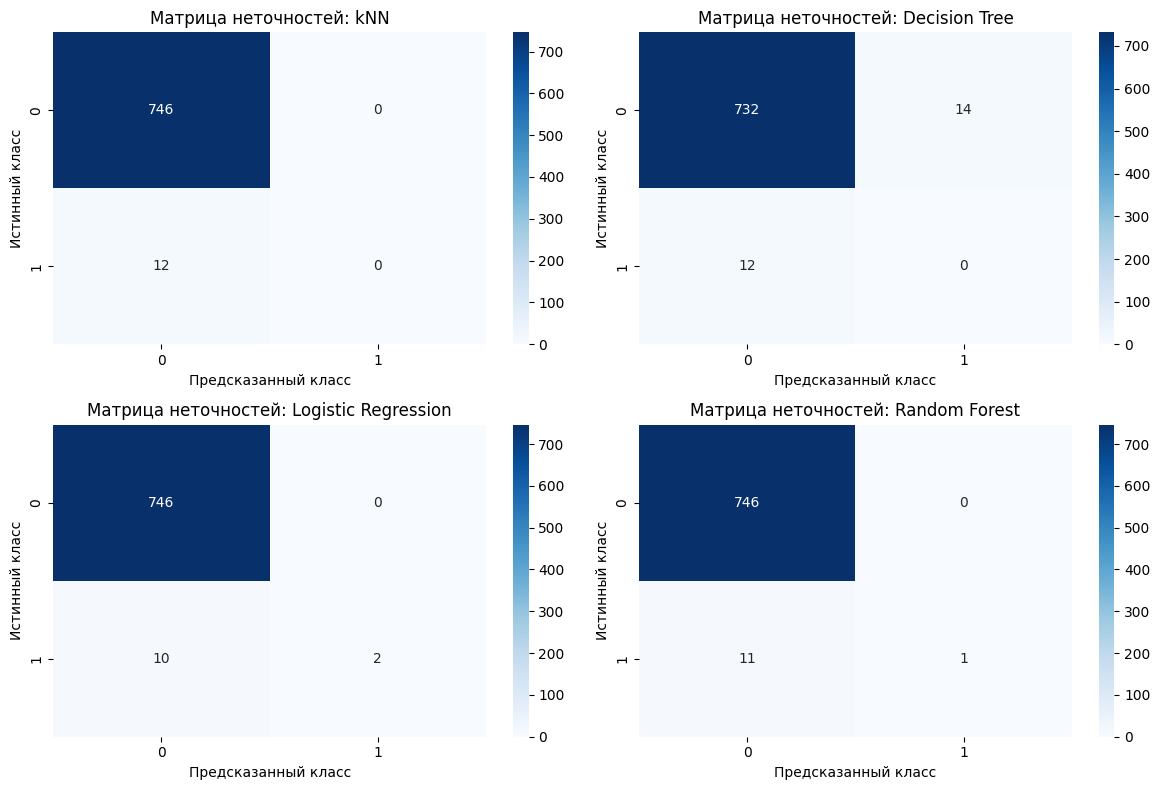

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))

for i, (name, (model, X_val)) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, model.predict(X_val))
    
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    
    plt.title(f"Матрица неточностей: {name}")
    plt.xlabel("Предсказанный класс")
    plt.ylabel("Истинный класс")

plt.tight_layout()
plt.show()

## Анализ матриц неточностей

На рисунке представлены матрицы неточностей для всех рассмотренных моделей
классификации. По оси Y отложен истинный класс, по оси X - предсказанный класс.

### kNN
Модель kNN корректно классифицирует всех здоровых пациентов
(746 истинно отрицательных предсказаний), однако **не выявляет ни одного
пациента с заболеванием**: все 12 больных пациентов были ошибочно
отнесены к классу «Здоров». Это объясняет нулевые значения Recall и F1-score для данной модели и указывает на её непригодность для медицинской диагностики.

### Дерево решений
Дерево решений также демонстрирует неспособность выявлять заболевших пациентов: все 12 пациентов с заболеванием были классифицированы как здоровые. При этом модель допустила 14 ложноположительных предсказаний. Несмотря на относительно высокую Accuracy, модель плохо справляется с выявлением положительного класса.

### Логистическая регрессия
Логистическая регрессия корректно выявляет часть пациентов с заболеванием: из 12 больных пациентов 2 были классифицированы верно. Количество ложных срабатываний при этом отсутствует. Это подтверждает более высокие значения Recall, F1-score и Balanced Accuracy по сравнению с предыдущими моделями и делает логистическую регрессию наиболее сбалансированной по качеству классификации.

### Случайный лес
Модель случайного леса также выявляет положительный класс, однако количество истинно положительных предсказаний меньше (1 из 12), чем у логистической регрессии. Это приводит к более низкому значению Recall, несмотря на высокую общую точность.

### Общий вывод
Анализ матриц неточностей показывает, что при сильном дисбалансе классов высокая Accuracy не является показателем качества модели. Наиболее информативными метриками для данной задачи являются Recall, F1-score и Balanced Accuracy.

С учётом полученных результатов **логистическая регрессия** демонстрирует наилучшее соотношение между выявлением заболевших пациентов и отсутствием ложных срабатываний.

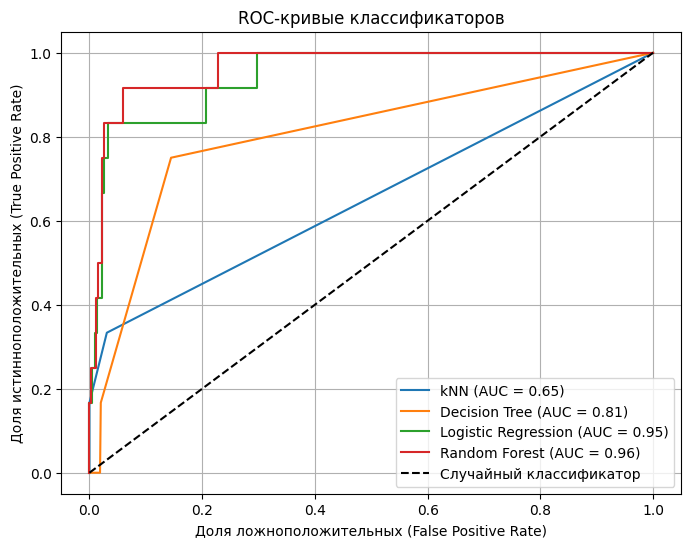

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(8, 6))
for name, (model, X_val) in models.items():
    proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# диагональ случайного классификатора
plt.plot([0, 1], [0, 1], 'k--', label="Случайный классификатор")

plt.xlabel("Доля ложноположительных (False Positive Rate)")
plt.ylabel("Доля истинноположительных (True Positive Rate)")
plt.title("ROC-кривые классификаторов")
plt.legend()
plt.grid()
plt.show()

## Анализ ROC-кривых и AUC

На графике представлены ROC-кривые для всех обученных моделей классификации. ROC-кривая отражает зависимость доли истинноположительных срабатываний (TPR) от доли ложноположительных срабатываний (FPR) при изменении порога принятия решения.

В качестве количественной меры качества используется показатель **AUC** (площадь под ROC-кривой), который характеризует способность модели различать классы независимо от выбранного порога классификации.

Модель **kNN** демонстрирует наименьшее значение AUC (0.65), что указывает на слабую способность различать здоровых и больных пациентов. Её ROC-кривая близка к диагонали случайного классификатора.

**Дерево решений** показывает заметно лучшее качество (AUC = 0.81), что свидетельствует о наличии дискриминирующей способности, однако модель остаётся менее устойчивой по сравнению с ансамблевыми методами.

**Логистическая регрессия** демонстрирует высокое значение AUC (0.95), что указывает на хорошую способность модели разделять классы даже при дисбалансе данных. ROC-кривая располагается близко к левому верхнему углу графика.

Наилучший результат показывает **случайный лес** (AUC = 0.96), что подтверждает его высокую эффективность и устойчивость к изменению порога классификации.

Таким образом, анализ ROC-кривых подтверждает выводы, полученные на основе матриц неточностей и метрик качества: наиболее информативными и устойчивыми моделями для данной задачи являются **логистическая регрессия** и **случайный лес**.


# Итоговый вывод по лабораторной работе

В ходе лабораторной работы была решена задача бинарной классификации медицинских данных с целью определения наличия заболевания у пациентов. Был выполнен полный цикл анализа данных: предварительная обработка, кодирование категориальных признаков, разделение данных на обучающую и тестовую выборки, стандартизация признаков, обучение и сравнение нескольких моделей машинного обучения.

В работе были рассмотрены четыре алгоритма классификации: k-ближайших соседей, логистическая регрессия, дерево решений и случайный лес. Качество моделей оценивалось с использованием метрик Accuracy, Precision, Recall, F1-score, Balanced Accuracy, а также с помощью матриц неточностей и ROC-кривых.

Проведённый анализ показал, что при выраженном дисбалансе классов высокое значение Accuracy не является достаточным показателем качества. Модели kNN и дерево решений, несмотря на высокую общую точность, фактически игнорируют положительный класс, что делает их непригодными для практического применения в медицинской диагностике.

Логистическая регрессия и случайный лес продемонстрировали способность выявлять пациентов с заболеванием, что подтверждается ненулевыми значениями Recall и F1-score, а также более высокими значениями Balanced Accuracy. Анализ ROC-кривых показал высокую разделяющую способность данных моделей, при этом наибольшее значение AUC было получено для модели случайного леса.

С точки зрения интерпретируемости наибольший практический интерес представляет логистическая регрессия, позволяющая оценить вклад отдельных медицинских показателей в вероятность заболевания. Случайный лес, в свою очередь, демонстрирует наилучшее общее качество классификации и устойчивость к переобучению.

Таким образом, цель лабораторной работы была достигнута. Проведённый анализ показал, что для задач медицинской диагностики при дисбалансе классов наиболее предпочтительными являются модели, способные обеспечивать баланс между точностью и полнотой, а не максимальное значение общей точности.

# Доп задания:

# Задание 4. Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

In [36]:
from sklearn.model_selection import GridSearchCV

simple_knn = KNeighborsClassifier(n_neighbors=5)
simple_knn.fit(X_train_scaled, y_train)

y_pred_simple = simple_knn.predict(X_test_scaled)

best_knn = grid_knn.best_estimator_
grid_knn.fit(X_train_scaled, y_train)

print("Лучшие параметры kNN:", grid_knn.best_params_)
print("Лучшее качество (CV):", grid_knn.best_score_)

Лучшие параметры kNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Лучшее качество (CV): 0.5390620006391817


In [31]:
simple_knn = KNeighborsClassifier(n_neighbors=5)
simple_knn.fit(X_train_scaled, y_train)

y_pred_simple = simple_knn.predict(X_test_scaled)

best_knn = grid_knn.best_estimator_

y_pred_best = best_knn.predict(X_test_scaled)
y_pred_simple = simple_knn.predict(X_test_scaled)

print("Accuracy kNN (GridSearch):", accuracy_score(y_test, y_pred_best))
print("Accuracy kNN (обычный):", accuracy_score(y_test, y_pred_simple))
print("Balanced Accuracy (GridSearch):", balanced_accuracy_score(y_test, y_pred_best))

Accuracy kNN (GridSearch): 0.9854881266490765
Accuracy kNN (обычный): 0.9841688654353562
Balanced Accuracy (GridSearch): 0.5416666666666666


В результате подбора гиперпараметров с помощью GridSearchCV для алгоритма kNN были найдены оптимальные параметры модели. По сравнению с моделью с фиксированными параметрами наблюдается незначительное увеличение общей точности. При этом сбалансированная точность остаётся низкой, что связано с сильным дисбалансом классов и ограниченной способностью алгоритма kNN выявлять редкий положительный класс. Подбор параметров улучшает качество модели, однако kNN остаётся малопригодным для данной задачи медицинской классификации

# Задание 10. Осуществить подбор оптимальных параметров с помощью GridSearchCV для случайного леса. Сравнить качество модели для подобранных параметров и любых других.

In [34]:
simple_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

simple_rf.fit(X_train, y_train)

y_pred_simple = simple_rf.predict(X_test)


grid_rf.fit(X_train, y_train)

print("Лучшие параметры RandomForest:", grid_rf.best_params_)
print("Лучшее качество (CV):", grid_rf.best_score_)

Лучшие параметры RandomForest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Лучшее качество (CV): 0.65


In [35]:
best_rf = grid_rf.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_pred_simple = simple_rf.predict(X_test)

print("Accuracy RF (GridSearch):", accuracy_score(y_test, y_pred_best))
print("Accuracy RF (обычный):", accuracy_score(y_test, y_pred_simple))
print("Balanced Accuracy RF (GridSearch):", balanced_accuracy_score(y_test, y_pred_best))

Accuracy RF (GridSearch): 0.9854881266490765
Accuracy RF (обычный): 0.9854881266490765
Balanced Accuracy RF (GridSearch): 0.58266309204647


Подбор гиперпараметров случайного леса с помощью GridSearchCV не привёл к увеличению общей точности по сравнению с моделью с заранее выбранными параметрами. Однако наблюдается рост сбалансированной точности, что указывает на улучшение способности модели выявлять пациентов с заболеванием. Таким образом, использование GridSearchCV позволяет повысить устойчивость модели к дисбалансу классов даже при неизменном значении Accuracy.

# Задание 15. Написать программу, которая для случайного для разного параметра n_estimators будет считать accuracy_score для тренировочных и тестовых данных (использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х - значение параметра n_estimators , по оси y  Accuracy, построить две линии для тренировочных и тестовых данных.

In [21]:
n_estimators_list = [10, 20, 50, 100, 200, 300]

train_acc = []
test_acc = []

for n in n_estimators_list:
    rf_temp = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    rf_temp.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, rf_temp.predict(X_train)))
    test_acc.append(accuracy_score(y_test, rf_temp.predict(X_test)))

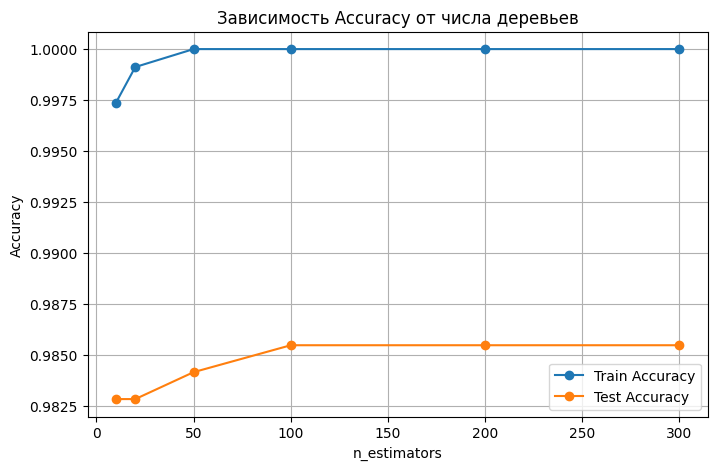

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_acc, marker='o', label='Train Accuracy')
plt.plot(n_estimators_list, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Зависимость Accuracy от числа деревьев')
plt.legend()
plt.grid()
plt.show()

Анализ зависимости точности классификации от числа деревьев в случайном лесе показал, что увеличение параметра n_estimators приводит к росту точности на обучающей выборке, в то время как точность на тестовой выборке стабилизируется при значениях n_estimators ≥ 100. Это свидетельствует об отсутствии выраженного переобучения и позволяет сделать вывод о целесообразности использования случайного леса с числом деревьев порядка 100–200.

# Задание 16. Проверить является ли датасет сбалансированным относительно распределения классов. Устранить дисбаланс классов и заново провести анализ, сделать выводы.

In [23]:
pd.Series(y_train).value_counts(normalize=True)

Disease
0    0.983722
1    0.016278
Name: proportion, dtype: float64

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

pd.Series(y_train_bal).value_counts()

Disease
0    2236
1    2236
Name: count, dtype: int64

In [39]:
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = rf_bal.predict(X_test)

print("Accuracy после SMOTE:", accuracy_score(y_test, y_pred_bal))
print("Recall после SMOTE:", recall_score(y_test, y_pred_bal))
print("Balanced Accuracy после SMOTE:", balanced_accuracy_score(y_test, y_pred_bal))

Accuracy после SMOTE: 0.9815303430079155
Recall после SMOTE: 0.5
Balanced Accuracy после SMOTE: 0.7446380697050938


Анализ распределения классов показал, что исходный датасет является сильно несбалансированным, что негативно влияет на способность моделей выявлять пациентов с заболеванием. Для устранения дисбаланса был применён метод SMOTE, позволивший сбалансировать классы в обучающей выборке. После балансировки наблюдается существенный рост полноты (Recall) и сбалансированной точности, что свидетельствует о значительном улучшении качества выявления положительного класса. При этом общее значение Accuracy незначительно снизилось, что является допустимой платой за повышение клинической значимости модели.